Новый размер 44


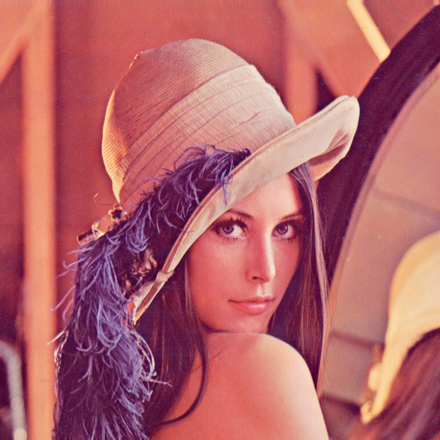

Размер изображения:
None (440, 440) RGB


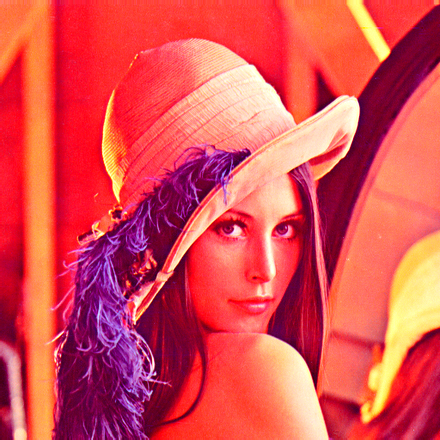

In [1]:
from IPython.display import display
from PIL import Image,ImageColor,ImageEnhance
import colorsys

# im_init = Image.open('./test_r1.jpg')
# newSize = 32
# upScale = 1
# factorV = (1,1,1)

im_init = Image.open('./test.png')
newSize = 44
upScale = 1
factorV = (1,1.5,1.5)

print("Новый размер",newSize)

display(im_init)

enhancer = ImageEnhance.Brightness(im_init)
factor = factorV[0] #increase contrast
im_init = enhancer.enhance(factor)

enhancer = ImageEnhance.Color(im_init)
factor = factorV[1] #increase contrast
im_init = enhancer.enhance(factor)

enhancer = ImageEnhance.Contrast(im_init)
factor = factorV[2] #increase color
im_init = enhancer.enhance(factor)


print("Размер изображения:")  
print(im_init.format, im_init.size, im_init.mode)
pixelMap = im_init.load()

im_resultRGB = Image.new( im_init.mode, (im_init.size[0]*upScale,im_init.size[1]*upScale))
pixelMapRGB = im_resultRGB.load()

display(im_init)

pallet = {0:("Red",(150,40,25)),
          1:("Brown",(90,55,50)),
          2:("Orange",(220,120,50)),
          3:("Yellow",(240,200,70)),
          4:("Fruit green",(140,160,70)),
          5:("Blue",(0,60,180)),
          6:("Light blue",(75,130,195)),
          7:("Green",(30,150,60)),
          8:("Pink",(220,165,220)),
          9:("Black",(30,30,30)),
          10:("Sky blue",(10,90,165)),
          11:("White",(230,230,230)),
          12:("Purple",(50,25,110)),
          13:("Grey",(130,140,150)),
          14:("Dark Grey",(60,70,80)),
          15:("Beige",(210,200,150)),
          16:("Skin",(240,200,180)),
         }

for i in range(len(pallet)):
    display(Image.new(mode="RGB", size=(20, 20), color=pallet[i][1]))
    
def compareColor(cl1,cl2):
  return pow( pow(cl1[0]-cl2[0],2)*1 + pow(cl1[1]-cl2[1],2)*1 + pow(cl1[2]-cl2[2],2)*0.5, 0.5 )

def findPalletNum(colorParam):
  srtPallet = {k: v for k, v in sorted(pallet.items(), key=lambda item: compareColor(item[1][1],colorParam), reverse=False)}
  return next(iter(srtPallet))     


Свертываются пиксели (10, 10)


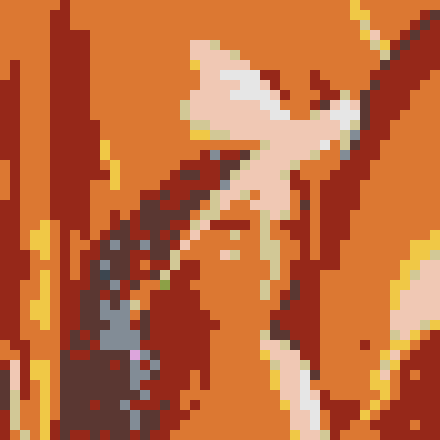

In [446]:
pixelNumMapped = (round(im_init.size[0]/newSize),round(im_init.size[1]/newSize))
print("Свертываются пиксели",pixelNumMapped)

pixelAvg = (0,0,0)
n=0

img_smallRGB = Image.new( im_init.mode, (newSize,newSize))
newSize = newSize - 1

pixelsNewRGB = img_smallRGB.load()

for i in range(img_smallRGB.size[0]):
    for j in range(img_smallRGB.size[1]):
        pixelAvgRGB=(0,0,0)
        pixelAvgHSV=(0,0,0)
        n=0
        for ii in range(0,round(pixelNumMapped[0])):
         for jj in range(0,round(pixelNumMapped[1])):
            n=n+1
            
            pixelCur = pixelMap[i*pixelNumMapped[0] + ii,j*pixelNumMapped[1] + jj]
            
            k = findPalletNum(pixelCur)
            pixelCur = pallet[k][1]

            pixelAvgRGB = (pixelAvgRGB[0]+pixelCur[0],
                        pixelAvgRGB[1]+pixelCur[1],
                        pixelAvgRGB[2]+pixelCur[2])  
            
            
            shakalPixelRGB = (round(pixelAvgRGB[0]/n),round(pixelAvgRGB[1]/n),round(pixelAvgRGB[2]/n))

            k = findPalletNum(shakalPixelRGB)
            pixelsNewRGB[i,j] = pallet[k][1]

#             pixelsNewRGB[i,j] = shakalPixelRGB

            
for i in range(im_resultRGB.size[0]):
    for j in range(im_resultRGB.size[1]):
        ii=i/(pixelNumMapped[0]*upScale)
        jj=j/(pixelNumMapped[1]*upScale)
        
        if(ii >= img_smallRGB.size[0]-1):
            ii=img_smallRGB.size[0]-1
        
        if(jj >= img_smallRGB.size[1]-1):
            jj=img_smallRGB.size[1]-1
            
        pixelMapRGB[i,j] = pixelsNewRGB[ii,jj]
        
display(im_resultRGB)

In [ ]:
1) try another measure
2) dithering

In [4]:
pixelMap[0,0]

(255, 124, 96)